<a href="https://colab.research.google.com/github/redroced/SAI-ai-/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

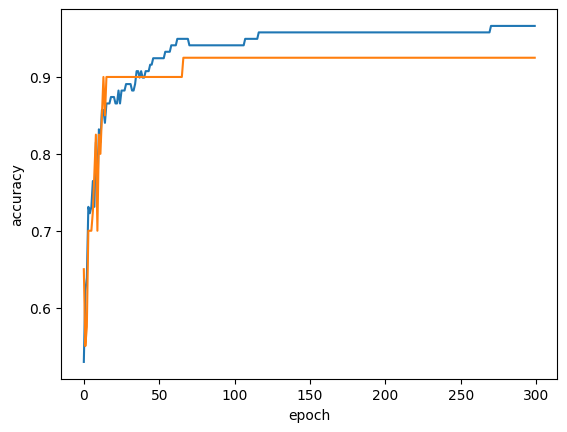

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# pytorch download

In [ ]:
!pip3 install torch
!pip3 install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# pytorch로 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
cols = ['Weight','Length','Diagonal','Height','Width', 'Species']

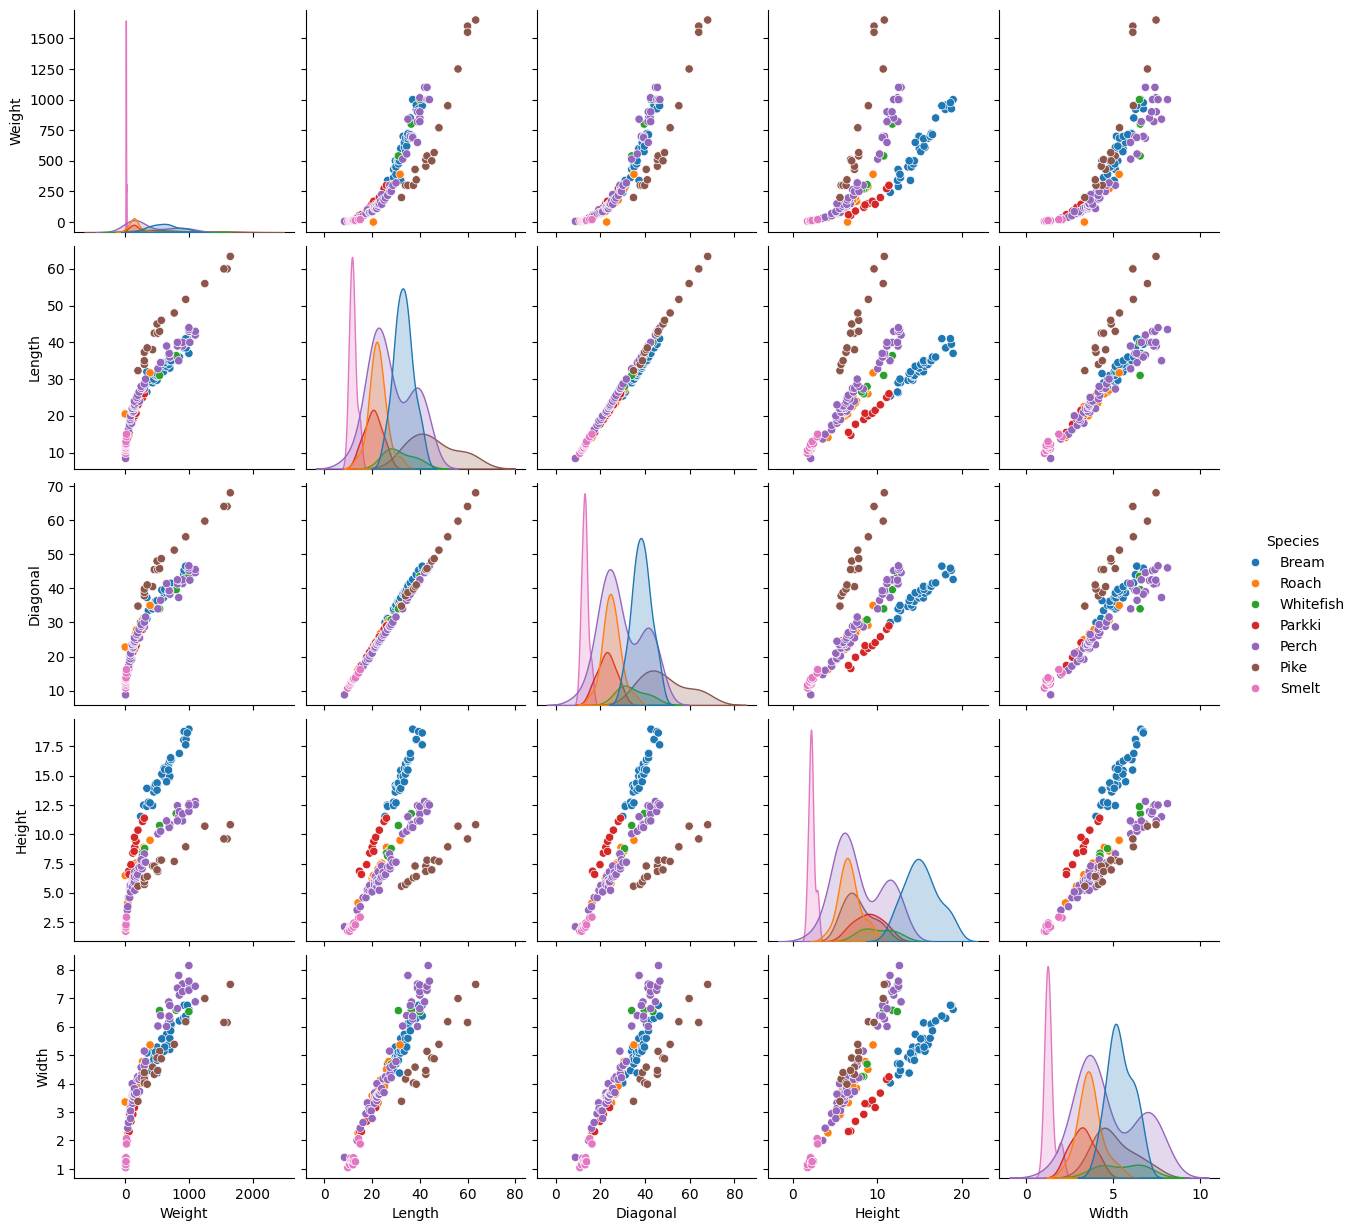

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(fish[cols], hue='Species')
plt.show()

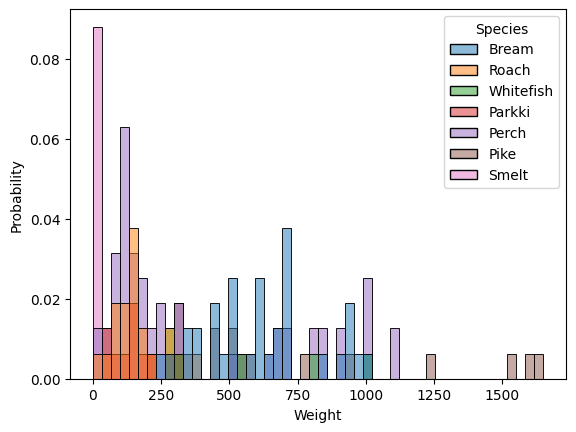

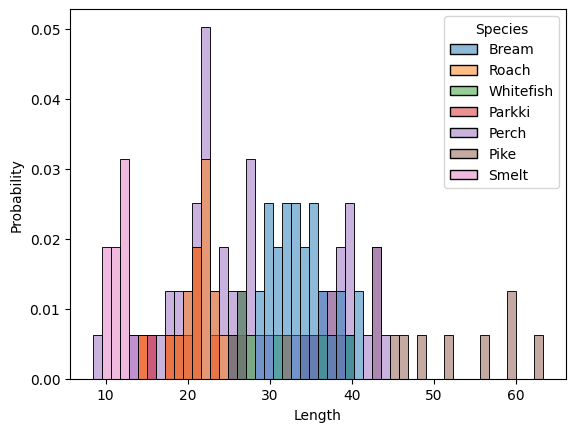

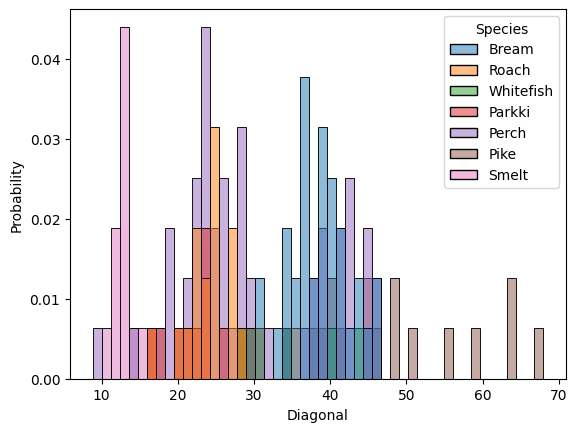

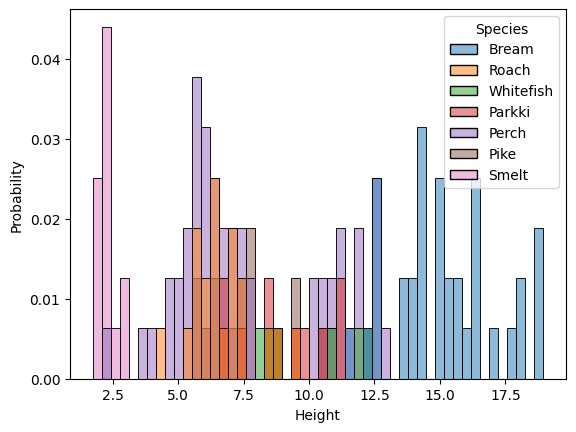

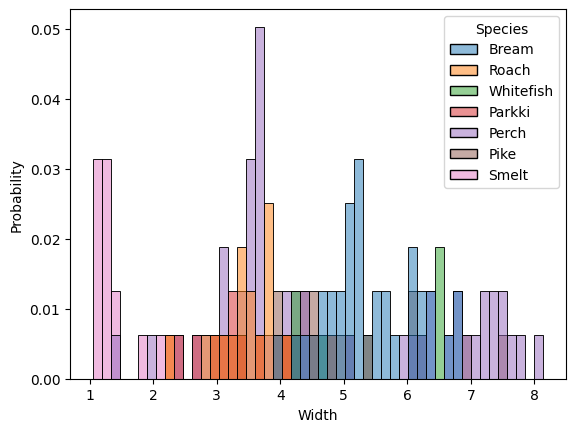

In [ ]:
for c in cols[:-1]:
  sns.histplot(fish, x=c, hue=cols[-1], bins=50, stat='probability')
  plt.show()

In [ ]:
import numpy as np

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
fish_target_encoded = le.fit_transform(fish_target)

In [ ]:
mean = np.mean(fish_input, axis=0)
std = np.std(fish_input, axis=0)
fish_input_norm = (fish_input - mean) / std

In [ ]:
indices = np.random.permutation(fish_input_norm.shape[0])

fish_input_shuffled = fish_input_norm[indices]
fish_target_shuffled = fish_target_encoded[indices]

In [ ]:
split_index = int(fish_input_shuffled.shape[0] * 0.75) #75:25 분리

x_train = fish_input_shuffled[:split_index]
y_train = fish_target_shuffled[:split_index]
x_test = fish_input_shuffled[split_index:]
y_test = fish_target_shuffled[split_index:]

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

torch.Size([119, 5]) torch.Size([40, 5])
torch.Size([119]) torch.Size([40])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 16
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
#하이퍼파라미터
n_epochs = 10000
print_interval = 100
learning_rate = 0.01

In [ ]:
class MyModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x) #CrossEntropyLoss

In [ ]:
input_dim = x_train.shape[1]
output_dim = len(np.unique(y_train))
model = MyModel(input_dim, output_dim)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(n_epochs):
    epoch_loss = 0.0
    correct = 0
    total = 0
    for batch_x, batch_y in train_loader:
        logits = model(batch_x)
        loss = loss_fn(logits, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        pred = torch.argmax(logits, dim=1)
        correct += (pred == batch_y).sum().item()
        total += batch_y.size(0)

    if (epoch + 1) % print_interval == 0:
        acc = correct / total
        print(f"[Epoch {epoch+1}] Loss: {epoch_loss:.4f} | Accuracy: {acc:.4f}")

In [ ]:
model.eval()
with torch.no_grad():
    logits = model(x_test)
    pred = torch.argmax(logits, dim=1)
    acc = (pred == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {acc:.4f}")

# 김기현의 부트캠프 with 파이토치 로지스틱 회귀 코드

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

df = pd.DataFrame(cancer.data, colums=cancer.feature_names)
df['class'] = cancer.target

sns.pairplot(df[['class']+list(df.colums[:10])])
plt.show()

sns.pairplot(df[['class']+list(df.colums[10:20])])
plt.show()

sns.pairplot(df[['class']+list(df.colums[20:30])])
plt.show()

cols = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
        'mean concave points', 'worst radius', 'worst texture',
        'worst smoothness','worst compactness','worst concave points',
        'class']

for c in cols[:-1]:
  sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
  plt.show()

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

data = torch.from_numpy(df[cols].values).float()

data.shape

#Split x and y
x = data[:, :-1]
y = data[:, -1:]

print(x.shape,y.shape)

#define configurations
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

#define costum model
class MyModel(nn.Module):

  def __init__(self, input_dim, output_dim):
    self.input_dim = input_dim
    self.output_dim = output_dim
    super().__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    self.act = nn.Sigmoid()

  def forward(self, x):
    # |x| = (batch_size, input_dim)
    y = self.act(self.linear(x))
    # |y| = (batch_size, output_dim)
    return y

model = MyModel(input_dim=x.size(-1), output_dim=y.size(-1))
crit = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for i in range(n_epochs):
  y_hat = model(x)
  loss = crit(y_hat,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (i+1) % print_interval == 0:
    print('epoch %d: loss=%.4e'%(i+1, loss))

correct_cnt = (y==(y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f' %(correct_cnt / total_cnt))

df = pd.DataFrame(torch.cat([y,y_hat],dim=1).detach().numpy(),
                  columns = ["y","y_hat"])

sns.histplot(df, x="y_hat", hue="y", bins=50, stat="probability")
plt.show()